# How to Train Scaled-YOLOv4 on Custom Objects

Scaled-YOLOv4 uses the same training procedures as YOLOv5.

This tutorial is based on the [YOLOv5 repository](https://github.com/ultralytics/yolov5) by [Ultralytics](https://www.ultralytics.com/). This notebook shows training on **your own custom objects**. Many thanks to Ultralytics for putting this repository together - we hope that in combination with clean data management tools at Roboflow, this technologoy will become easily accessible to any developer wishing to use computer vision in their projects.


### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train Scaled-YOLOv4 on your custom objects. We use a [public blood cell detection dataset](https://public.roboflow.ai/object-detection/bccd), which is open source and free to use. You can also use this notebook on your own data.

To train our detector we take the following steps:

* Install Scaled-YOLOv4 dependencies
* Download custom Scaled-YOLOv4 object detection data
* Write our Scaled-YOLOv4 Training configuration
* Run Scaled-YOLOv4 training
* Evaluate Scaled-YOLOv4 performance
* Visualize Scaled-YOLOv4 training data
* Run Scaled-YOLOv4 inference on test images
* Export saved Scaled-YOLOv4 weights for future inference





#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# clone Scaled_YOLOv4
!git clone https://github.com/WongKinYiu/ScaledYOLOv4.git  # clone repo
%cd /content/ScaledYOLOv4/
#checkout the yolov4-large branch
!git checkout yolov4-large

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1MB 1.5MB/s eta 0:03:16tcmalloc: large alloc 1147494400 bytes == 0x558bf7532000 @  0x7f8e0b7b0615 0x558bbe25706c 0x558bbe336eba 0x558bbe259e8d 0x558bbe34b99d 0x558bbe2cdfe9 0x558bbe2c8b0e 0x558bbe25b77a 0x558bbe2cde50 0x558bbe2c8b0e 0x558bbe25b77a 0x558bbe2ca86a 0x558bbe34c7c6 0x558bbe2c9ee2 0x558bbe34c7c6 0x558bbe2c9ee2 0x558bbe34c7c6 0x558bbe2c9ee2 0x558bbe34c7c6 0x558bbe3ce431 0x558bbe32f049 0x558bbe299c84 0x558bbe25a8e9 0x558bbe2ceade 0x558bbe25b69a 0x558bbe2c9a45 0x558bbe2c8e0d 0x558bbe25b77a 0x558bbe2c9a45 0x558bbe25b69a 0x558bbe2c9a45
     |█████████████████████████████▊  | 1055.7MB 1.5MB/s eta 0:00:54tcmalloc: large alloc 1434370048 bytes == 0x558c3bb88000 @  0x7f8e0b7b0615 0x558bbe25706c 0x558bbe336eba 0x558bbe259e8d 0x558bbe34b99d 0x558bbe2cdfe9 0x558bbe2c8b0e 0x558bbe25b77a 0x558bbe2cde50 0x558bbe2c8b0e 0x558bbe25b77a 0x558bbe2ca86a 0x558bbe34c7c6 0x558bbe2c9ee2 0

In [2]:
#install mish activation funciton for cuda
%cd /content/
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

/content
Cloning into 'mish-cuda'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 1.35 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/mish-cuda
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cud

In [3]:
!pip install -U PyYAML

     |████████████████████████████████| 645kB 11.5MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
%cd /content/ScaledYOLOv4/


/content/ScaledYOLOv4


# Download Correctly Formatted Custom Dataset 
do not use Scaled-YOLOv4.  But use "YOLO v5 pytorch" instead

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [5]:
# Export code snippet and paste here
%cd /content
#!curl -L "https://app.roboflow.com/ds/h91wwIw5An?key=[YOUR KEY HERE]" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# tiled dataset (yolo5)
!curl -L "https://public.roboflow.com/ds/7sMyUaB3Md?key=HcIVbx3QKI" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# large dataset (scaled-yolo4)
# !curl -L "https://public.roboflow.com/ds/22cDQWRwpK?key=9Qq6CFrbcV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1251      0 --:--:-- --:--:-- --:--:--  1251
100 35.6M  100 35.6M    0     0  10.5M      0  0:00:03  0:00:03 --:--:-- 16.2M
Archive:  roboflow.zip
 extracting: test/images/DJI_0267_JPG.rf.659fc518abe4994a0a04b681103029cc.jpg  
 extracting: test/images/DJI_0289_JPG.rf.7d2ce495fb2d3a19962e761e718c3a5e.jpg  
 extracting: test/images/DJI_0267_JPG.rf.12b4ae5e9e4ac08da13f17c5e555fd8f.jpg  
 extracting: test/images/DJI_0267_JPG.rf.0a39d3f51902b67bf0162fe19793d9aa.jpg  
 extracting: test/images/DJI_0262_JPG.rf.8c378a23b8822f63a44ad24c8787fab3.jpg  
 extracting: test/images/DJI_0316_JPG.rf.2406ceec1ba7c548483c4f2e33c674b9.jpg  
 extracting: test/images/DJI_0312_JPG.rf.783c9643ea6b0f5cc51eff20b27af449.jpg  
 extracting: test/images/DJI_0312_JPG.rf.544df0e3a7b2778052c9110942b032a7.jpg  
 extracting:

In [6]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 5
names: ['boat', 'car', 'dock', 'jetski', 'lift']

#Inspect Model Configuration and Architecture

Let's look at the Scaled-YOLOv4 Configuration architecture

In [7]:
%cat /content/ScaledYOLOv4/models/yolov4-csp.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov4-csp backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2
   [-1, 1, Bottleneck, [64]],
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4
   [-1, 2, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 5-P3/8
   [-1, 8, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 7-P4/16
   [-1, 8, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]], # 9-P5/32
   [-1, 4, BottleneckCSP, [1024]],  # 10
  ]

# yolov4-csp head
# na = len(anchors[0])
head:
  [[-1, 1, SPPCSP, [512]], # 11
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [8, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   [-1, 2, Bott

# Train Custom Scaled-YOLOv4 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights.
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train scaled-YOLOv4 on custom data for 100 epochs
# time its performance
%%time
%cd /content/ScaledYOLOv4/
!python train.py --img 416 --batch 16 --epochs 50 --data '../data.yaml' --cfg ./models/yolov4-csp.yaml --weights '' --name yolov4-csp-results  --cache

/content/ScaledYOLOv4
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov4-csp.yaml', data='../data.yaml', device='', epochs=50, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', img_size=[416, 416], local_rank=-1, logdir='runs/', multi_scale=False, name='yolov4-csp-results', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='', world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2021-03-19 08:18:28.984583: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s':

# Evaluate Custom Scaled-YOLOv4 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

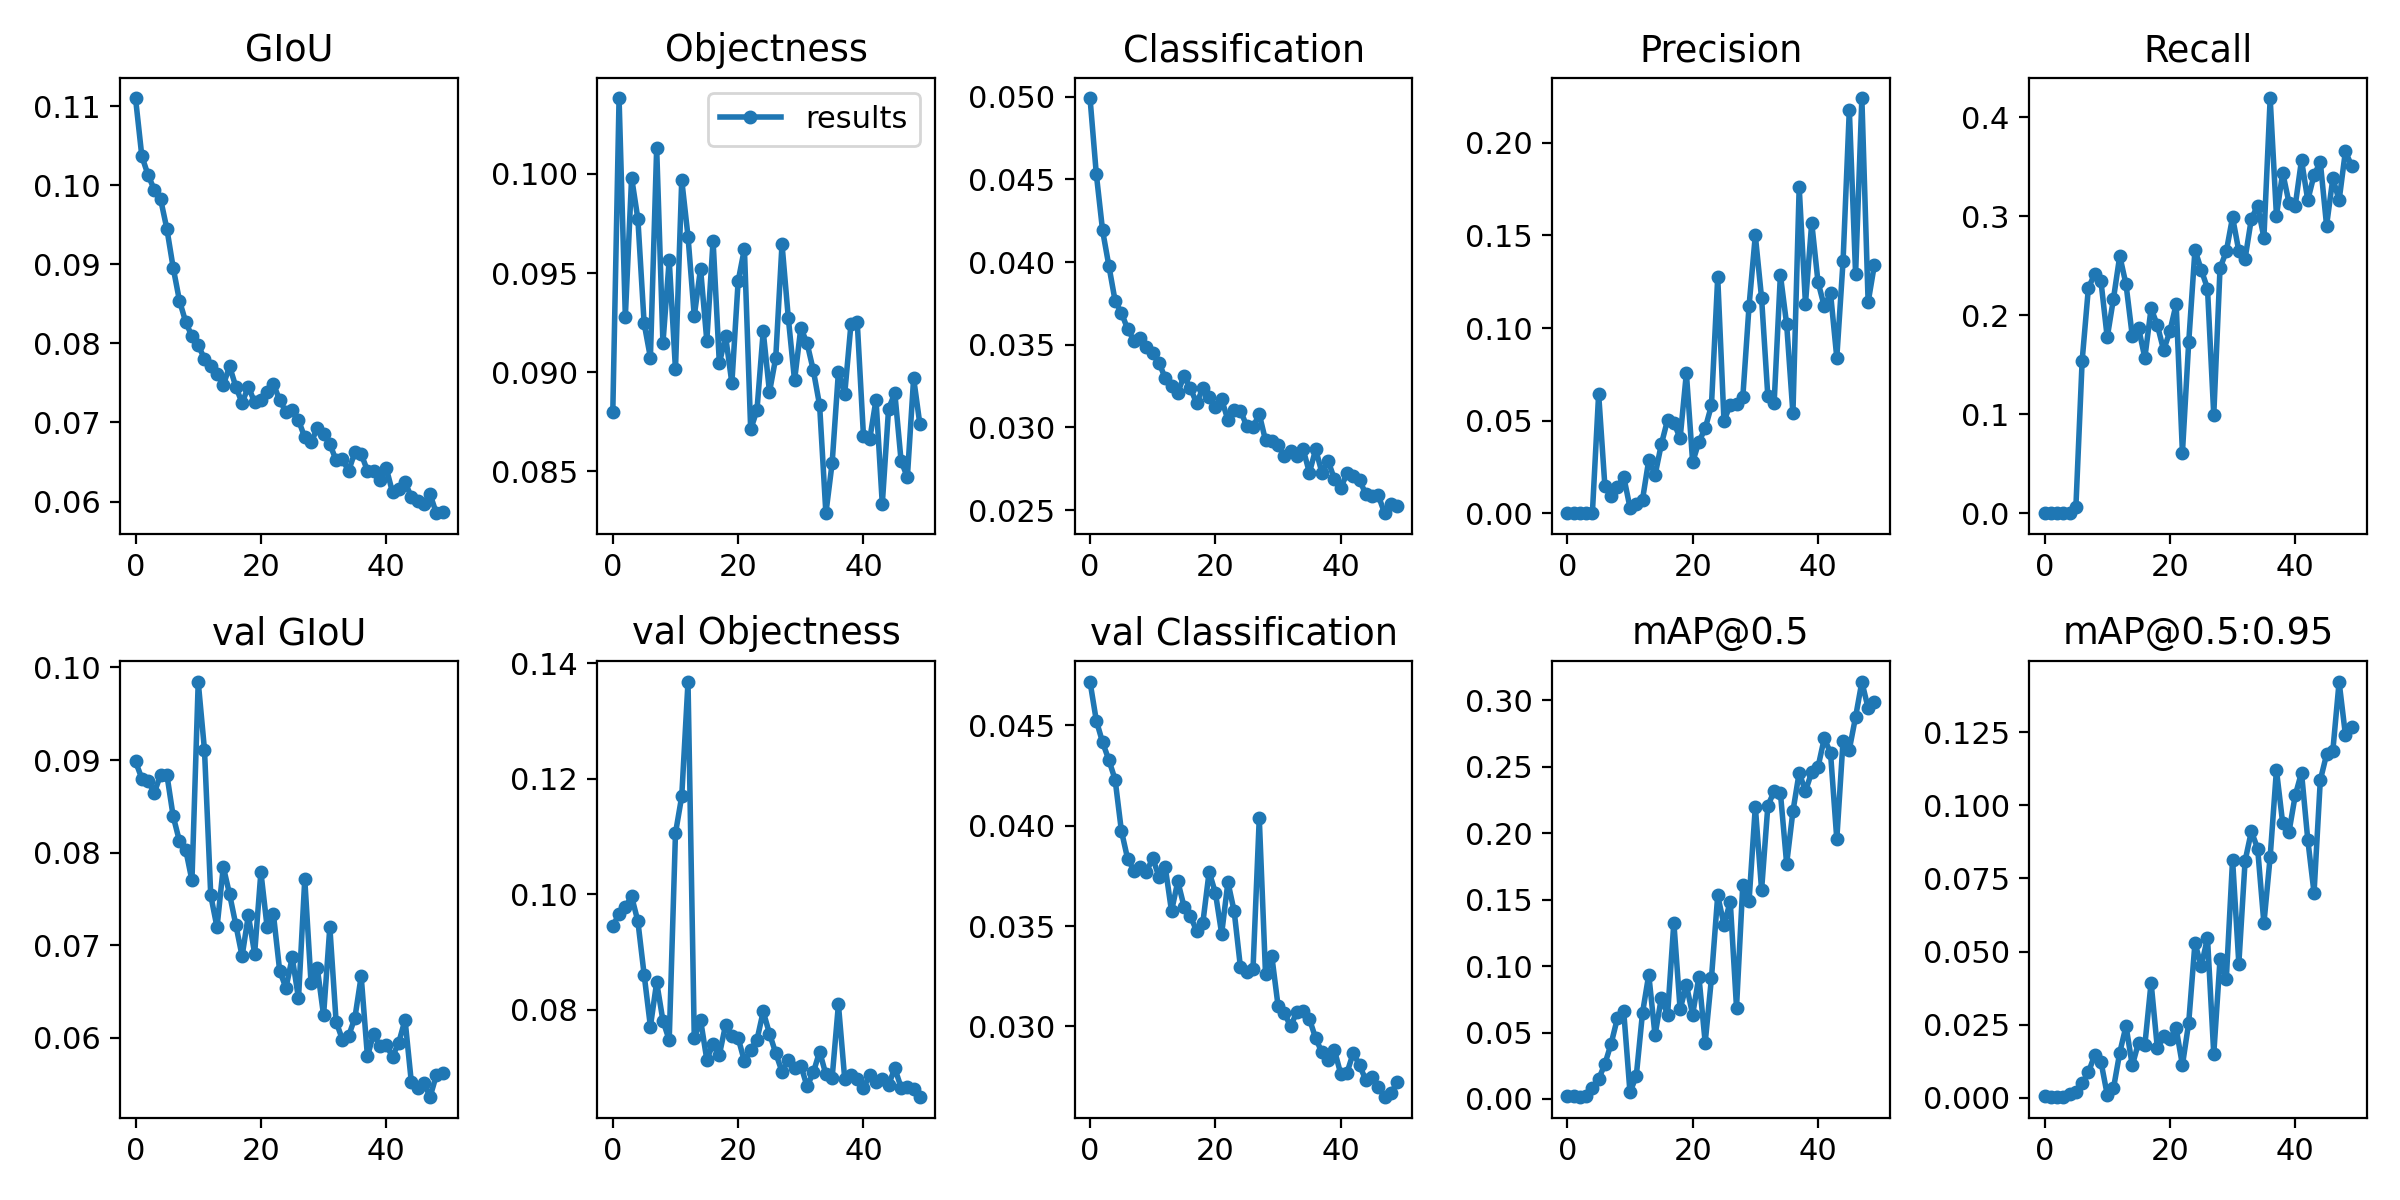

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
#from utils.general import plot_results  # plot results.txt as results.png
from IPython.display import Image, display
display(Image('/content/ScaledYOLOv4/runs/exp0_yolov4-csp-results/results.png'))  # view results.png

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

GROUND TRUTH TRAINING DATA:


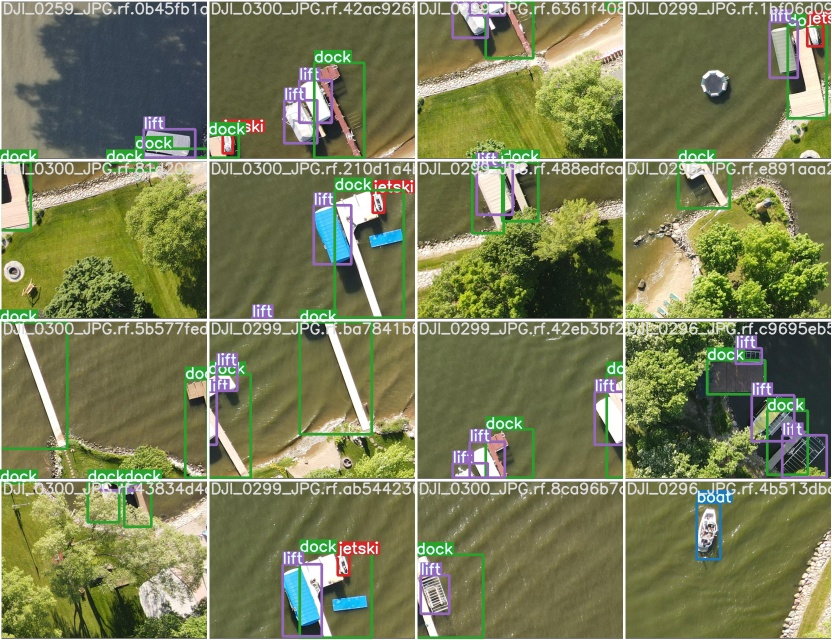

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/ScaledYOLOv4/runs/exp0_yolov4-csp-results/test_batch0_gt.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


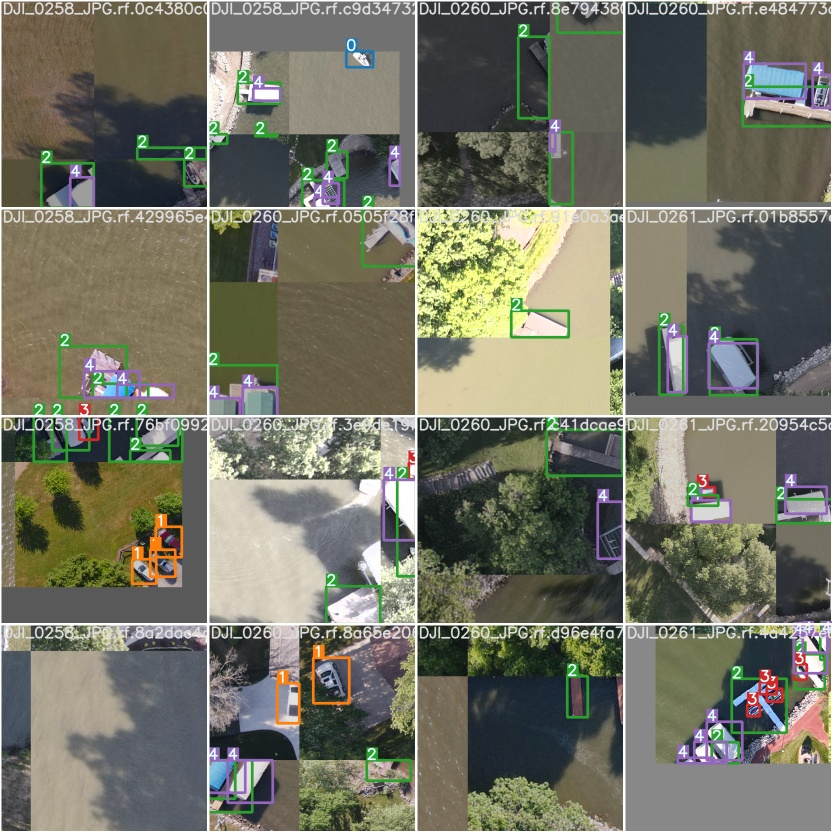

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/ScaledYOLOv4/runs/exp0_yolov4-csp-results/train_batch0.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

exp0_yolov4-csp-results/


In [ ]:
%ls ./runs/exp0_yolov4-csp-results/weights

best_yolov4-csp-results.pt        last_030.pt  last_042.pt
best_yolov4-csp-results_strip.pt  last_031.pt  last_043.pt
last_020.pt                       last_032.pt  last_044.pt
last_021.pt                       last_033.pt  last_045.pt
last_022.pt                       last_034.pt  last_046.pt
last_023.pt                       last_035.pt  last_047.pt
last_024.pt                       last_036.pt  last_048.pt
last_025.pt                       last_037.pt  last_049.pt
last_026.pt                       last_038.pt  last_yolov4-csp-results.pt
last_027.pt                       last_039.pt  last_yolov4-csp-results_strip.pt
last_028.pt                       last_040.pt
last_029.pt                       last_041.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/ScaledYOLOv4/
!python detect.py --weights ./runs/exp0_yolov4-csp-results/weights/best_yolov4-csp-results_strip.pt --img 416 --conf 0.4 --source ../test/images

/content/ScaledYOLOv4
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='../test/images', update=False, view_img=False, weights=['./runs/exp0_yolov4-csp-results/weights/best_yolov4-csp-results_strip.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... Model Summary: 235 layers, 5.24921e+07 parameters, 5.04494e+07 gradients
image 1/32 /content/test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg: 416x416 Done. (0.025s)
image 2/32 /content/test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg: 416x416 Done. (0.025s)
image 3/32 /content/test/images/DJI_0262_JPG.rf.560b36a2e292c1b3dee7eae7e1f3fbf0.jpg: 416x416 1 docks, Done. (0.024s)
image 4/32 /content/test/images/DJI_0262_JPG.rf.5f24b2ccccf544d3bb0c3cb740be0f4b.jpg: 416x416 1 lifts, Done. (0.024s)
image 5/32 /content/test/images/DJI_0262_JPG.rf.66b031d

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above
import glob
from IPython.display import Image, display

for imageName in glob.glob('./inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import files
files.download('./runs/exp0_yolov4-csp-results/weights/best_yolov4-csp-results_strip.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>